In [ ]:
import numpy as np
import seaborn as sns
import itertools #Python内置库，这里用来从总体中取出固定大小的所有样本
from scipy import stats
from matplotlib import pyplot as plt

# 抽样分布的例子

- 总体样本量N=4
- 变量X为个体的年龄
- X的取值是: 18, 20, 22, 24

## 总体的平均值、标准差、分布

In [15]:
population =[18,20,22,24]

In [16]:
pop_mean = np.mean(population)
pop_mean

21.0

In [17]:
pop_std = np.std(population)#总体均值
pop_std

2.23606797749979

<AxesSubplot: ylabel='Count'>

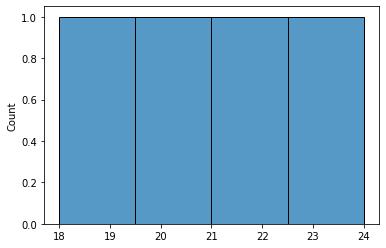

In [18]:
#总体分布图
sns.histplot(population,bins=4)

## 样本均值的抽样分布（n=2）

## 取多个样本量n=2的样本

In [19]:
samples = list(itertools.product(population,repeat = 2))
samples

[(18, 18),
 (18, 20),
 (18, 22),
 (18, 24),
 (20, 18),
 (20, 20),
 (20, 22),
 (20, 24),
 (22, 18),
 (22, 20),
 (22, 22),
 (22, 24),
 (24, 18),
 (24, 20),
 (24, 22),
 (24, 24)]

In [20]:
# 样本均值
sample_means = []
for i,j in samples:
    sample_means.append( np.mean((i,j)) )
sample_means

[18.0,
 19.0,
 20.0,
 21.0,
 19.0,
 20.0,
 21.0,
 22.0,
 20.0,
 21.0,
 22.0,
 23.0,
 21.0,
 22.0,
 23.0,
 24.0]

In [21]:
# 样本平均值的的平均值（means of sample means）
mean_sampling_distribution = np.mean(sample_means)
mean_sampling_distribution

21.0

In [22]:
# 样本均值的标准误（Standard Error）
std_sampling_distribution = np.std(sample_means)
std_sampling_distribution

1.5811388300841898

<AxesSubplot: ylabel='Count'>

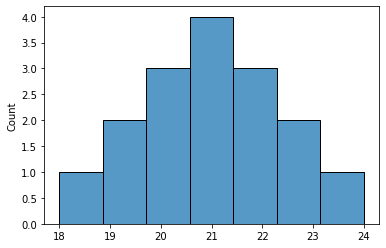

In [23]:
# 样本平均值的分布图
sns.histplot(sample_means,bins =7)

## 比较总体分布与样本均值的分布

**总体**
- N = 4
- μ = 21 
- σ = 2.236

**样本均值的分布（n=2）**
- $\mu_{\bar{X}}$ = 21 
- $\sigma_{\bar{X}}$ =1.58


可发现：

$$\mu_{\bar{X}}=\mu$$

$$\sigma_{\bar{X}}=\frac{\sigma}{\sqrt{n}} $$

# 总体服从正态分布

如果总体服从正态分布（均值为μ，标准差为σ），那么 $\bar{X}$的抽样分布同样服从正态分布，且：
$$\mu_{\bar{X}}=\mu$$
$$\sigma_{\bar{X}}=\frac{\sigma}{\sqrt{n}}$$


In [24]:
#生成1000个服从正态分布（均值为100，标准差为10）的数值
popul_1 = np.random.normal(100,10,size =1000)
# popul_1

In [25]:
#总体平均值
np.mean(popul_1)

99.76468172489555

In [26]:
#总体标准差
np.std(popul_1)

9.97722159626972

<AxesSubplot: ylabel='Count'>

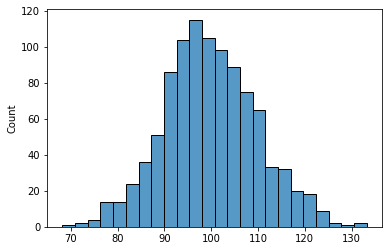

In [27]:
#总体分布图
sns.histplot(x=popul_1)

## 样本平均值抽样分布（n=2）

取样本容量为2的样本（一共有$1000^2$个样本）


In [28]:
samples_1 = list(itertools.product(popul_1,repeat = 2))

In [29]:
# 样本均值
samples_1_means = []
for i,j in samples_1:
    samples_1_means.append( np.mean((i,j)) )

In [30]:
#样本均值的均值
np.mean(samples_1_means)

99.76468172489551

In [31]:
#样本均值的标准误
np.std(samples_1_means)

7.05496104812319

<AxesSubplot: ylabel='Count'>

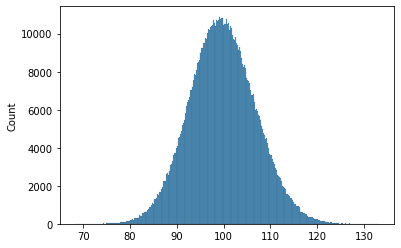

In [32]:
#样本均值（n=2）的分布
sns.histplot(samples_1_means)

# 总体不服从正态分布

根据**中心极限定理（Central Limit Theorem）** ，即使总体不是正态分布，当抽取的样本n足够大时（n > 30） 时，样本均值的抽样分布近似服从正态分布，且样本均值的抽样分布有以下性质：

$$\mu_{\bar{X}}=\mu$$
$$\sigma_{\bar{X}}=\frac{\sigma}{\sqrt{n}}$$

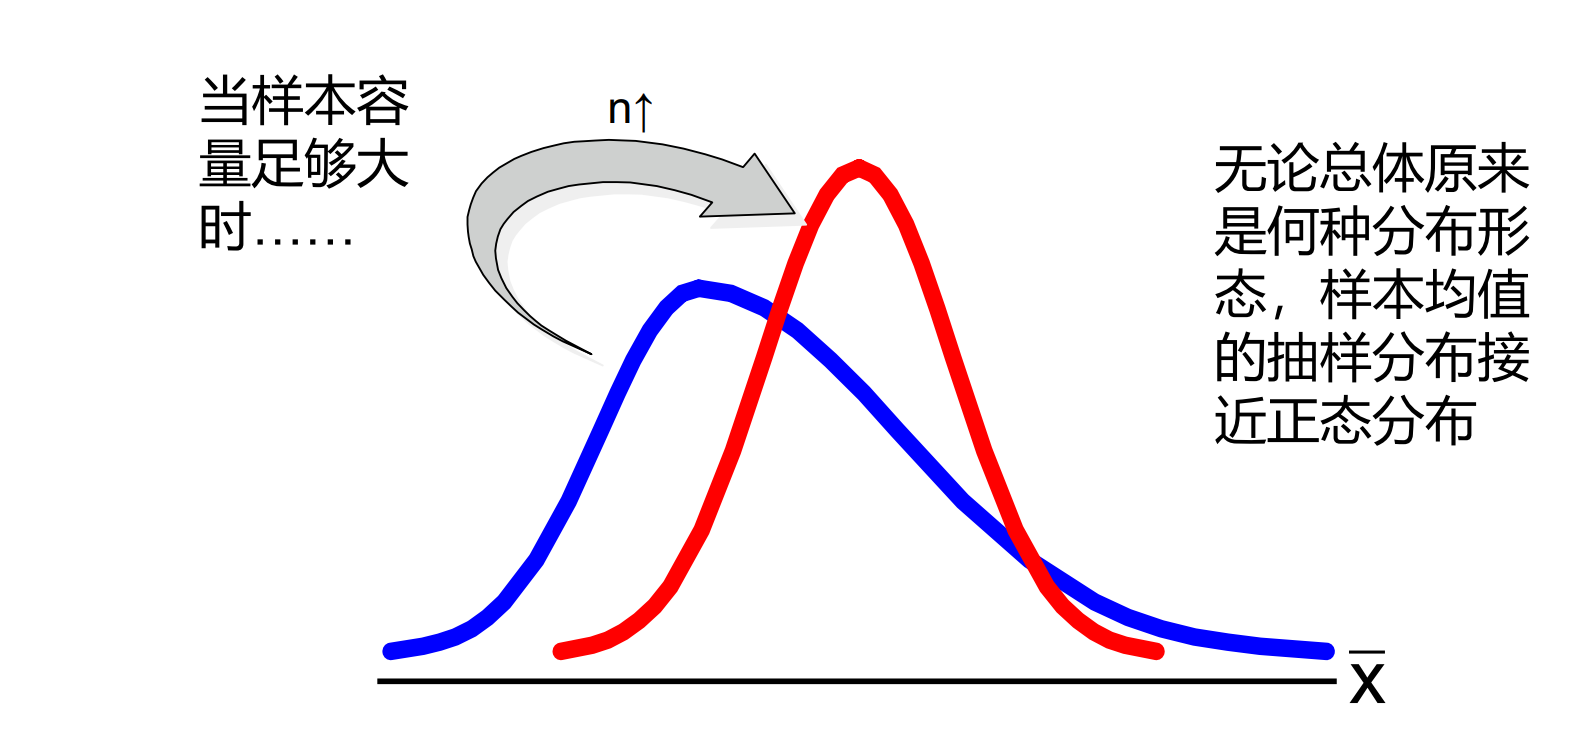

In [4]:
#从1-101随机抽取100个正整数作为总体
popul_2 = np.random.choice(range(1,101),size=100)
popul_2

array([19, 29, 61, 74, 58,  7, 94, 53, 47,  2, 73,  1, 75, 57, 37, 65, 84,
       75, 86, 87, 84, 26, 22, 88, 72, 34, 12, 27, 40, 15, 65, 82, 32, 33,
       99, 19, 83, 48, 73, 86, 14, 41, 51, 57, 75, 16, 97, 72, 12, 78, 85,
       50, 81, 13, 24, 27, 22, 71, 96, 65, 73, 56, 77,  9, 47, 72, 74, 74,
       59, 24, 40, 56, 93, 51, 79, 62, 18, 55, 56, 87, 41, 60, 75, 89, 78,
       10, 10, 21, 41, 74, 74,  9, 23, 41, 90, 18, 25, 67, 51, 99])

In [5]:
#总体平均值
np.mean(popul_2)

53.29

In [6]:
#总体标准差
np.std(popul_2)

27.539896513966784

<AxesSubplot: ylabel='Count'>

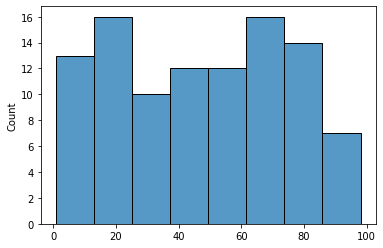

In [19]:
#总体分布图
sns.histplot(x=popul_2)

In [ ]:
# 从总体中取样本容量n=35的样本出来
samples_2 = list(itertools.product(popul_2,repeat = 35))

上一行代码提示内存不足，这是因为可以取的样本个数达到$100^{35}$个，这数字大小超出了Python可以处理的范围。因此，我们只从总体中抽取10000个样本，探索样本均值分布的规律。

In [8]:
# 从总体中抽取10000个样本(n=35)，并计算其平均值
samples_2_means = []
for i in range(0,10000):
    s = np.random.choice(popul_2,size=35).mean()
    samples_2_means.append(s)


In [9]:
# 样本均值的均值
np.mean(samples_2_means)

53.347280000000005

In [10]:
# 样本均值的标准误
np.std(samples_2_means)

4.656065873452236

<AxesSubplot: ylabel='Count'>

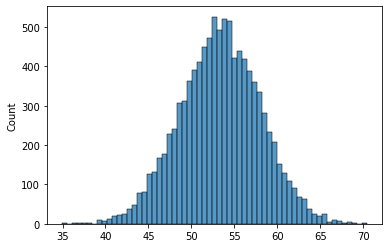

In [11]:
# 样本均值的分布
sns.histplot(samples_2_means)

# 探索：样本容量不同，样本均值的抽样分布的情况

**案例**：有一个总体（N=100），取值范围为1-100。

现在我们想通过抽样的办法来推断这个总体的平均分。



## 样本容量分别为1，5，10，50的抽样方式（都是重复抽样10000次），结果会怎么样？


<AxesSubplot: ylabel='Count'>

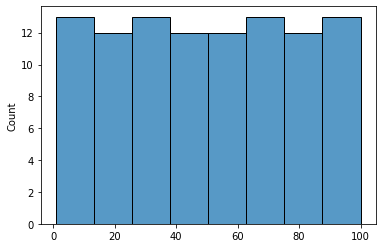

In [12]:
data = np.array(range(1, 101))

sns.histplot(data)

## n = 1 的情形

<AxesSubplot: ylabel='Count'>

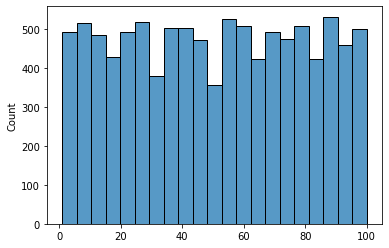

In [13]:
# 重复抽取10000次

sample_mean =[]
for i in range(1, 10001):
    s = np.random.choice(data, size=1).mean()
    sample_mean.append(s)
sns.histplot(sample_mean)

## n = 5 的情形

<AxesSubplot: ylabel='Count'>

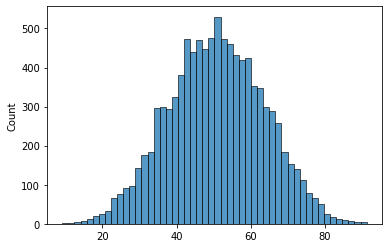

In [14]:
# 重复抽取10000次

sample_mean =[]
for i in range(1, 10001):
    s = np.random.choice(data, size=5).mean()
    sample_mean.append(s)
sns.histplot(sample_mean)

## n = 10 的情形

<AxesSubplot: ylabel='Count'>

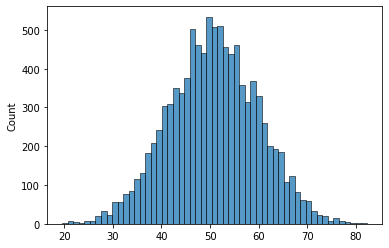

In [15]:
# 重复抽取10000次

sample_mean =[]
for i in range(1, 10001):
    s = np.random.choice(data, size=10).mean()
    sample_mean.append(s)
sns.histplot(sample_mean)

## n = 50 的情形

<AxesSubplot: ylabel='Count'>

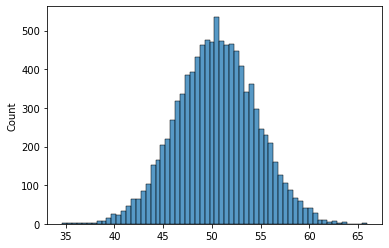

In [16]:
# 重复抽取10000次

sample_mean =[]
for i in range(1, 10001):
    s = np.random.choice(data, size=50).mean()
    sample_mean.append(s)
sns.histplot(sample_mean)

# 练习
**某总体服从正态分布（μ = 400， σ = 20）。**

**(1)假如从总体中随机抽取n =25 的样本。求样本均值95%的范围区间上下限。（Z分数分别是-1.96及1.96时， $\bar{X}$的取值）**


由题意，样本均值服从正态分布（$\mu_{\bar{X}} = \mu=400$,$\sigma_{\bar{X}}=\frac{\sigma}{\sqrt{n}}=20/\sqrt{25}$）

In [14]:
s_mean =400
s_se = 20/np.sqrt(25)
ci = stats.norm.interval(confidence=0.95,loc=s_mean,scale=s_se)
ci  #样本均值95%的范围区间上下限（95%的置信区间）

(392.1601440618398, 407.8398559381602)

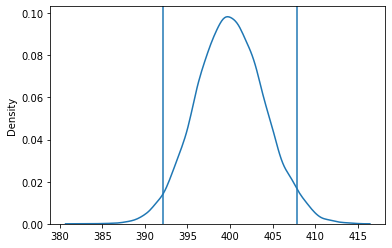

In [15]:
#画图
data = np.random.normal(loc = s_mean, scale = s_se,size=10000)
sns.kdeplot(data)
plt.axvline(ci[0])
plt.axvline(ci[1])

**(2)假如从总体中随机抽取n =100 的样本。求样本均值95%的范围区间上下限。（Z分数分别是-1.96及1.96时，$\bar{X}$的取值）**

由题意，样本均值服从正态分布（$\mu_{\bar{X}} = \mu=400$,$\sigma_{\bar{X}}=\frac{\sigma}{\sqrt{n}}=20/\sqrt{100}$）

In [19]:
s_mean_2 =400
s_se_2 = 20/np.sqrt(100)
ci_2 = stats.norm.interval(confidence=0.95,loc=s_mean_2,scale=s_se_2)
ci_2  #样本均值95%的范围区间上下限（95%的置信区间）

(396.0800720309199, 403.9199279690801)

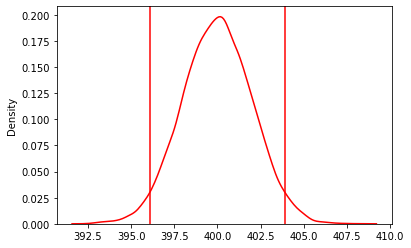

In [20]:
#画图
data_2 = np.random.normal(loc = s_mean_2, scale = s_se_2,size=10000)
sns.kdeplot(data_2,color ="red")
plt.axvline(ci_2[0],color ="red")
plt.axvline(ci_2[1],color ="red")

------------------------------ 
**将两张图合在一起**

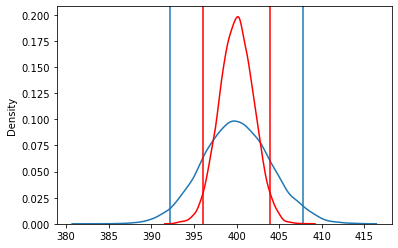

In [21]:
sns.kdeplot(data)
plt.axvline(ci[0])
plt.axvline(ci[1])

sns.kdeplot(data_2,color ="red")
plt.axvline(ci_2[0],color ="red")
plt.axvline(ci_2[1],color ="red")

由上图，我们可以直观地看到，样本容量越大，样本均值的标准误越小，95%的置信区间也越小